In [62]:
#conda install pip

In [4]:
#pip install tensorflow

In [1]:
import pandas as pd
import tensorflow as tf

### Reading the Dataset into a pandas dataframe

###### The dataset contains 17 attributes in total with the 'cnt' attribute being the target attribute which is a continuous numeric variable 

In [2]:
df = pd.read_csv("hour.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Dropping unnecessary columns which we will not be using as inputs, such as 'instant', 'date', 'casual', 'registered'
#### After dropping these columns, the target variable can be approximated as a function of the input variables

In [4]:
y = df.cnt
df = df.drop(columns=['instant', 'dteday','casual','registered','cnt'])

In [5]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


#### Splitting the dataset into Train and Test datasets, where Train dataset is used to train the neural network to generate an approximate function that can map the input variables to the output variable. Once the network has been trained, the performance of the network can be evaluated using the test dataset. If the training & test mse are in line then we can rule out the problem of overfitting.
###### The train_test_split function of sklearn library is being used to randomly shuffle and split the dataset into train and test

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,y, test_size=0.2, random_state=42, shuffle=True)

In [8]:
print("Number of rows in training dataset:", len(x_train))
print("Number of columns used as input:", len(x_train.columns))

Number of rows in training dataset: 13903
Number of columns used as input: 12


## Building the "d-2d-1" Neural Network architecture using the keras function of tensorflow library
### This architecture contains one hidden layer with 24 nodes (since this dataset has 12 inputs) and an output layer with one node. The sigmoid activation function is being used at the hidden layers as shown in the below code. Since the dependent variable is a continuous numeric variable, no activation function is being used at the output layer to let the obtained output remain in its continuous numeric form. The model is compiled with the Mean Square Error (MSE) metric as the loss function. 

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 2*len(x_train.columns), activation = 'sigmoid', input_shape = (len(x_train.columns),)))
model.add(tf.keras.layers.Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

### Fitting the Neural Network using x_train as input and y_train as target to obtain the fitted neural network model with the optimum weights to produce the best function approximation of the target variable which will yield unbiased and low variance estimates
#### Specifying the batch_size as the number of rows in the dataset to perform "Batch Gradient Descent". Setting the number of epochs to 25,000, since Batch Gradient Descent requires a large number of epochs for the model to converge to a global optima and yield a minimum possible MSE.
#### Number of epochs = number of weight updates in the case of Batch Gradient Descent, hence we can plot the number of epochs vs MSE to observe a trend in how MSE varies with epochs, i.e. to track the variation in MSE with every weight update. Ideally, we should observe a downward trend initially followed by a flat trend afterwards. This is because, the MSE will continue to decrease drastically with every epoch until global optima is reached, after which the MSE will not decrease any more.

In [9]:
fitted_model = model.fit(x_train, y_train, epochs =100, validation_data=(x_test,y_test), batch_size = len(x_train))

Epoch 1/100
1/1 [==============================] - 0s 319ms/step - loss: 69726.8047 - mse: 69726.8047 - val_loss: 66080.1641 - val_mse: 66080.1641
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 69717.1484 - mse: 69717.1484 - val_loss: 66070.7656 - val_mse: 66070.7656
Epoch 3/100
1/1 [==============================] - 0s 31ms/step - loss: 69707.4844 - mse: 69707.4844 - val_loss: 66061.3594 - val_mse: 66061.3594
Epoch 4/100
1/1 [==============================] - 0s 35ms/step - loss: 69697.7969 - mse: 69697.7969 - val_loss: 66051.9531 - val_mse: 66051.9531
Epoch 5/100
1/1 [==============================] - 0s 35ms/step - loss: 69688.1250 - mse: 69688.1250 - val_loss: 66042.5391 - val_mse: 66042.5391
Epoch 6/100
1/1 [==============================] - 0s 39ms/step - loss: 69678.4219 - mse: 69678.4219 - val_loss: 66033.0938 - val_mse: 66033.0938
Epoch 7/100
1/1 [==============================] - 0s 32ms/step - loss: 69668.7188 - mse: 69668.7188 - val_loss: 66023.6328

Epoch 57/100
1/1 [==============================] - 0s 26ms/step - loss: 69108.6797 - mse: 69108.6797 - val_loss: 65475.0703 - val_mse: 65475.0703
Epoch 58/100
1/1 [==============================] - 0s 26ms/step - loss: 69094.4297 - mse: 69094.4297 - val_loss: 65461.0820 - val_mse: 65461.0820
Epoch 59/100
1/1 [==============================] - 0s 27ms/step - loss: 69080.0156 - mse: 69080.0156 - val_loss: 65446.9141 - val_mse: 65446.9141
Epoch 60/100
1/1 [==============================] - 0s 26ms/step - loss: 69065.4062 - mse: 69065.4062 - val_loss: 65432.5469 - val_mse: 65432.5469
Epoch 61/100
1/1 [==============================] - 0s 28ms/step - loss: 69050.6094 - mse: 69050.6094 - val_loss: 65418.0156 - val_mse: 65418.0156
Epoch 62/100
1/1 [==============================] - 0s 28ms/step - loss: 69035.6250 - mse: 69035.6250 - val_loss: 65403.3047 - val_mse: 65403.3047
Epoch 63/100
1/1 [==============================] - 0s 28ms/step - loss: 69020.4609 - mse: 69020.4609 - val_loss: 6538

In [20]:
model_loss = pd.DataFrame(model.history.history)

### As expected, we can observe a drastic exponential decrease in MSE with every weight update, but after around 12,000 weight updates, curve flattens and we observe a slight decrease in MSE from that point onwards

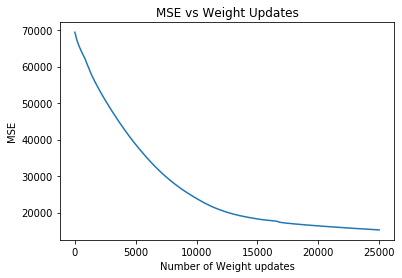

In [22]:
model_loss.head()
import matplotlib.pyplot as plt
plt.plot(model_loss.index,model_loss.mse)
 
# Add title and axis names
plt.title('MSE vs Weight Updates')
plt.xlabel('Number of Weight updates')
plt.ylabel('MSE')
 
# Show graphic
plt.show()

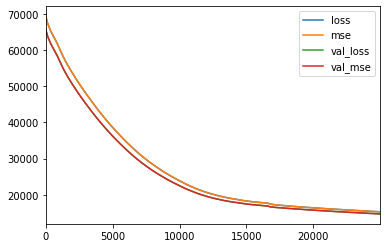

In [21]:
model_loss.plot()

### 2. NUMPY IMPLEMENTATION of d-2d-1 network

In [9]:
import numpy as np

In [10]:
xtrain_arr = x_train.to_numpy()
y_train_arr = y_train.to_numpy()

In [12]:
no_layers = 2
weights_1 = np.random.normal(-1.0, 1.0, size=(len(xtrain_arr[0]), 2*len(xtrain_arr[0])))
weights_2 = np.random.normal(-1.0, 1.0, size=(2*len(xtrain_arr[0]), 1))
no_epochs = 100
learning_rate = 0.2
mse = []
epoch_inst = 1
while(epoch_inst <= no_epochs):
    
    delta2 = np.zeros(2*len(xtrain_arr[0]))
    delta1 = np.zeros((len(xtrain_arr[0]), 2*len(xtrain_arr[0])))
    sse = 0
    for i in range(len(xtrain_arr)):  ### Row wise iteration
        output1 = xtrain_arr[i].dot(weights_1)  ###24 Net inputs to every node (dot product of 12 for each of the 24 nodes & inputs)
        output1 = 1/(1+np.exp(-output1)) ### Sigmoid function on all 24 net inputs to 24 nodes of 1st hidden layer
        output2 = output1.dot(weights_2) ### dot products of 24 outputs from 24 nodes and 24 weights to get 1 final output
        output2 = 1/(1+np.exp(-output2)) ### sigmoid function on output of output node
        sse = sse + (y_train_arr[i]-output2[0])**2
        for j in range(len(weights_2)): ### Backpropogation to calculate & summate delta for each of the 24 weights of output node
            delta2[j] = delta2[j]+ (-1*(y_train_arr[i]-output2[0])*output2[0]*(1-output2[0])*output1[j])
    
        ## Backpropogation to calculate & sum delta for each of the 12 weights on all 24 nodes 
        for k in range(len(delta1[0])): 
            for l in range(len(delta1)):
                delta1[l][k] = delta1[l][k] + (-1*((y_train_arr[i]-output2[0])*output2[0]*(1-output2[0])*weights_2[k])*output1[k]*(1-output1[k])*xtrain_arr[i][l])

    ### Appending MSE after 1 epoch, i.e. after obtaining sse over entire batch
    print(epoch_inst,sse/len(xtrain_arr))
    mse.append(sse/len(xtrain_arr))
    
    ### Updating Weights2 and Weights1 after 1 epoch for batch gradient descent, i.e after running over all the rows after the end of inner for loop
    ### Weight is updated by taking average delta and multiplying with learning rate
    for t in range(len(weights_2)):
        #if delta2[t] > 0:
        weights_2[t] = weights_2[t] - learning_rate*(delta2[t]/len(xtrain_arr))
        #else:
        #    weights_2[t] = weights_2[t] - learning_rate*(delta2[t]/len(xtrain_arr))
    for x in range(len(weights_1)):
        for y in range(len(weights_1[0])):
            #if delta1[x][y] > 0:
            weights_1[x][y] = weights_1[x][y] - learning_rate*(delta1[x][y]/len(xtrain_arr))
            #else:
                #weights_1[x][y] = weights_1[x][y] - learning_rate*(delta1[x][y]/len(xtrain_arr))
    epoch_inst = epoch_inst+1

1 69488.27505310794
2 69198.38385518479
3 69142.24056652645
4 69142.1759288022
5 69142.1206511392
6 69142.07280837749
7 69142.03097388163
8 69141.99406712787
9 69141.9612542002
10 69141.93188085755
11 69141.905426369
12 69141.88147092432
13 69141.85967218723
14 69141.83974811302
15 69141.82146416239
16 69141.80462365253
17 69141.78906036903
18 69141.7746328565
19 69141.76121994831
20 69141.74871723427
21 69141.7370342494
22 69141.72609220492
23 69141.71582215509
24 69141.70616350103
25 69141.69706275722
26 69141.68847253405
27 69141.68035068858
28 69141.6726596146
29 69141.66536564956
30 69141.65843856403
31 69141.65185113675
32 69141.64557878571
33 69141.63959925924
34 69141.63389235949
35 69141.6284397146
36 69141.62322457596
37 69141.61823163994
38 69141.61344689786
39 69141.60885749754
40 69141.60445163195
41 69141.6002184292
42 69141.5961478653
43 69141.59223068002
44 69141.58845830809
45 69141.5848228131
46 69141.5813168312
47 69141.57793352191
48 69141.57466651857
49 69141.57150